# CellMigration MD simulation
## Yunsik Choe (CANONEQAL, SNU, rep. of Korea)

## force

In [5]:
from Cell_Lab import Cell_Lab
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [22]:
C1 = Cell_Lab(L=100,N_ptcl=1,Fs=500)
C1.D = 0
C1.tau = 10
C1.l1 = 1.5
C1.l2 = 2
C1.r1 = 5
C1.r2 = 2
C1.k1 = 25
C1.k2 = 20
C1.mu = 1
C1.mur = 0.1
C1.N_skip = 50
name = '5'

model initialized


In [23]:
C1.record = True
C1.animate(3000,name)

<IPython.core.display.Javascript object>

 32%|███▏      | 950/3000 [01:00<02:10, 15.68it/s]


KeyboardInterrupt: 

In [21]:
import imageio
import os
from PIL import Image
path_dir = os.getcwd()+'/record/'+name+'/'
t_list = np.arange(3000)
path=[path_dir+f"{t}.png" for t in t_list]
paths=[Image.open(i) for i in path]
imageio.mimsave(path_dir+'anim'+name+'.gif',paths,fps=30)

## active noise statistics verification

In [1]:
from Cell_Lab import Cell_Lab
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt

In [9]:
C1 = Cell_Lab(L=300,N_ptcl = 100000,Fs=1000)

model initialized


100%|██████████| 30000/30000 [02:34<00:00, 194.04it/s]


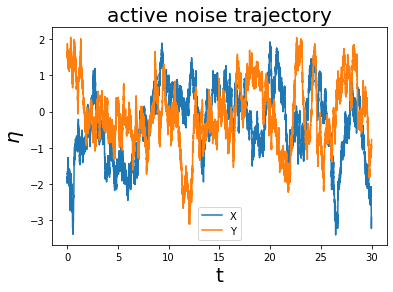

In [10]:
# active noise trajectory

simul_time = 30

duration = simul_time*C1.Fs
noiseX_history = np.empty([duration,C1.N_ptcl])
noiseY_history = np.empty([duration,C1.N_ptcl])

for i in trange(duration):
    noiseX_history[i] = C1.etaX
    noiseY_history[i] = C1.etaY
    C1.noise_evolve()
    
plt.title('active noise trajectory',fontsize=20)
plt.plot(np.linspace(0,simul_time,simul_time*C1.Fs),noiseX_history[:,0],label='X')
plt.plot(np.linspace(0,simul_time,simul_time*C1.Fs),noiseY_history[:,0],label='Y')
plt.xlabel('t',fontsize=20)
plt.ylabel(r'$\eta$',fontsize=20)
plt.legend()
plt.show()

In [55]:
measure_time = 5
t_axis = np.linspace(0,measure_time,measure_time*C1.Fs)+1/C1.Fs
autocorrX = np.empty(measure_time*C1.Fs)
autocorrY = np.empty(measure_time*C1.Fs)
for i in trange(measure_time*C1.Fs):
    autocorrX[i] = np.average(noiseX_history[i+1:]*noiseX_history[:-i-1])
    autocorrY[i] = np.average(noiseY_history[i+1:]*noiseY_history[:-i-1])


100%|██████████| 5000/5000 [11:08<00:00,  7.48it/s]


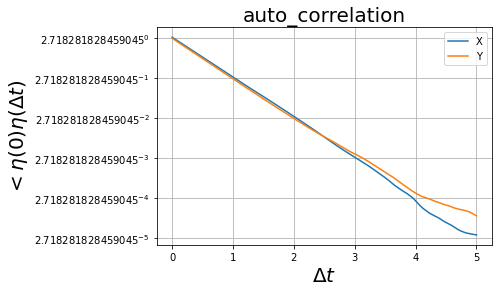

In [61]:
plt.title('auto_correlation',fontsize=20)
plt.plot(t_axis,autocorrX,label='X')
plt.plot(t_axis,autocorrY,label='Y')
plt.xlabel(r'$\Delta t$',fontsize=20)
plt.ylabel(r'$<\eta(0)\eta(\Delta t)$',fontsize=20)
plt.yscale('log',base=np.e)
plt.legend()
plt.grid()
plt.show()

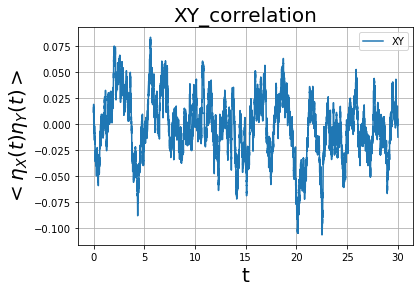

In [4]:
XYcorr = np.average(noiseX_history*noiseY_history,axis=1)

plt.title('XY_correlation',fontsize=20)
plt.plot(np.linspace(0,simul_time,simul_time*C1.Fs),XYcorr,label='XY')
plt.xlabel('t',fontsize=20)
plt.ylabel(r'$<\eta_X(t)\eta_Y(t)>$',fontsize=20)
# plt.yscale('log',base=np.e)
plt.legend()
plt.grid()
plt.show()

100%|██████████| 999/999 [00:00<00:00, 1923.02it/s]


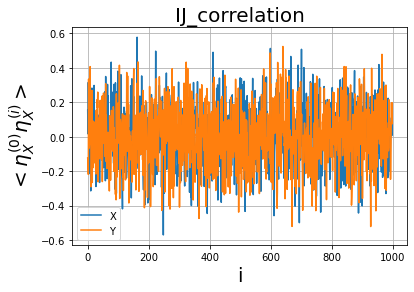

In [8]:
IJcorrX = np.empty(C1.N_ptcl-1)
IJcorrY = np.empty(C1.N_ptcl-1)

for i in trange(C1.N_ptcl-1):
    IJcorrX[i] = np.average(noiseX_history[:,0]*noiseX_history[:,i+1])
    IJcorrY[i] = np.average(noiseY_history[:,0]*noiseY_history[:,i+1])

    
plt.title('IJ_correlation',fontsize=20)
plt.plot(np.arange(C1.N_ptcl-1),IJcorrX,label='X')
plt.plot(np.arange(C1.N_ptcl-1),IJcorrY,label='Y')

plt.xlabel('i',fontsize=20)
plt.ylabel(r'$<\eta_X^{(0)}\eta_X^{(i)}>$',fontsize=20)
# plt.yscale('log',base=np.e)
plt.legend()
plt.grid()
plt.show()